<a href="https://colab.research.google.com/github/Suvam7407/GitHub-Projects/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re
import numpy as np

In [0]:
trainDf=pd.read_csv("train.csv")
testDf=pd.read_csv("test.csv")
print(trainDf.shape)
print(testDf.shape)

(31962, 3)
(17197, 2)


In [0]:
trainDf.sample(5)

,id,label,tweet
12702,12703,0,ð¹ ed dancing ð #edsheeran #dancing #love...
28427,28428,0,"contact college dean, find out about intern 2 ..."
5078,5079,0,happiness isn't getting all you want. it's en...
18966,18967,0,i am thankful for rain. #thankful #positive
2170,2171,0,@user now that is life like! just like a man!...


In [0]:
testDf.sample(5)

,id,tweet
8787,40750,twitter censoring my impressions in hopes they...
205,32168,#model i love u take with u all the time in ...
1872,33835,omfg !!!!!!!! ð±ð±ð±ð±ð±ððð...
576,32539,haileysporn - na: #sexy #shy #porn #horny #nas...
14689,46652,today's the day: interviewing for the new ceo ...


In [0]:
combDf=trainDf.append(testDf,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
combDf.sample(4)

,id,label,tweet
20080,20081,0.0,#diversity polar bear climb racing: angry po...
15185,15186,0.0,#visiting gorilla simulator: you need to do ...
3566,3567,0.0,wishing you a happy weekend and with this kind...
15463,15464,1.0,@user did someone say #antisemetic ? gee (((@u...


In [0]:
combDf["tweet"]=combDf["tweet"].str.lower()
combDf.sample(4)

,id,label,tweet
22245,22246,0.0,@user the only way you can find this data for...
32479,32480,NaN,i'm really with my quick 20 minute #flower #...
11332,11333,0.0,happy satnight boy ð¦ #feel #alone #make ...
25329,25330,0.0,thx for the update. the shooting was brazen....


In [0]:
def remove_pat(s1,pat,nstr):
  return re.sub(pat,nstr,s1)
combDf["new_tweet"]=np.vectorize(remove_pat)(combDf["tweet"],"@[\w]*","")


In [0]:
combDf.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:
combDf["new_tweet"]=np.vectorize(remove_pat)(combDf["new_tweet"],"[^a-zA-Z#_]+"," ")

In [0]:
combDf.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause the...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [0]:
def m1(s1,pat):
  return " ".join(re.findall(pat,s1))
combDf["hash"]=np.vectorize(m1)(combDf["new_tweet"],r"#(\w+)")
combDf["new_tweet"]=np.vectorize(remove_pat)(combDf["new_tweet"],r"#[a-z]+"," ")  

In [0]:
combDf.head()

,id,label,tweet,new_tweet,hash
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...,run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for credit i can t use cause they do...,lyft disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty,
3,4,0.0,#model i love u take with u all the time in ...,i love u take with u all the time in ur,model
4,5,0.0,factsguide: society now #motivation,factsguide society now,motivation


In [0]:
combDf["new_tweet"]=np.vectorize(remove_pat)(combDf["new_tweet"],r"\b[a-z]{1,2}\b"," ")

In [0]:
combDf.head()

,id,label,tweet,new_tweet,hash
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish...,run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for credit can use cause they do...,lyft disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty,
3,4,0.0,#model i love u take with u all the time in ...,love take with all the time,model
4,5,0.0,factsguide: society now #motivation,factsguide society now,motivation


In [0]:
allword=" ".join([text for text in combDf["new_tweet"]])

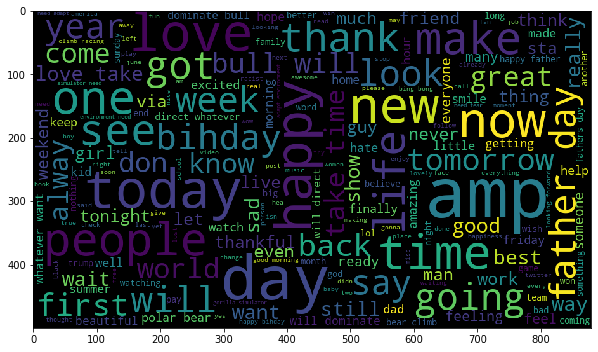

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
wordcloud=WordCloud(width=880,height=500,random_state=21,max_font_size=110).generate(allword)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

In [0]:
df2=combDf["new_tweet"][combDf["label"]==1]
allword=" ".join([text for text in df2])

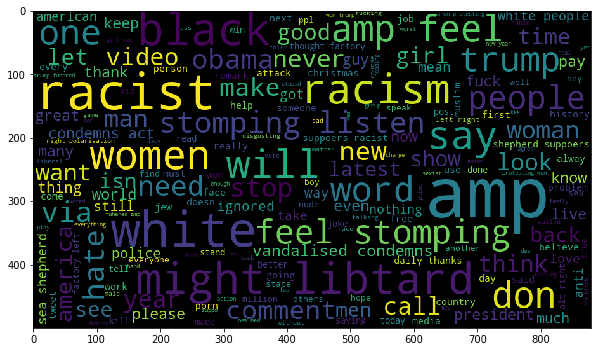

In [0]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=880,height=500,random_state=21,max_font_size=110).generate(allword)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

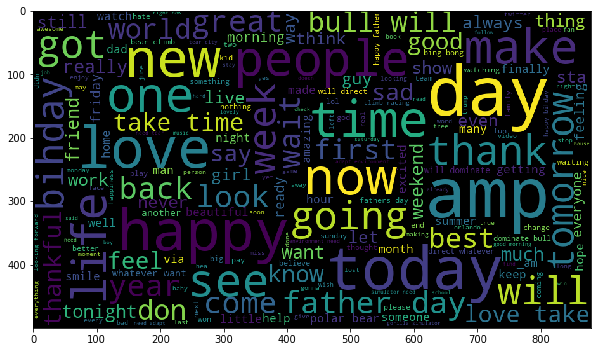

In [0]:
df2=combDf["new_tweet"][combDf["label"]==0]
allword=" ".join([text for text in df2])

from wordcloud import WordCloud
wordcloud=WordCloud(width=880,height=500,random_state=21,max_font_size=110).generate(allword)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

In [0]:
df2=combDf["new_tweet"][combDf["label"]==1]
allword=" ".join([text for text in df2])
df2=combDf["hash"][combDf["label"]==1]
allhash=" ".join([text for text in df2])
allw=allword+allhash

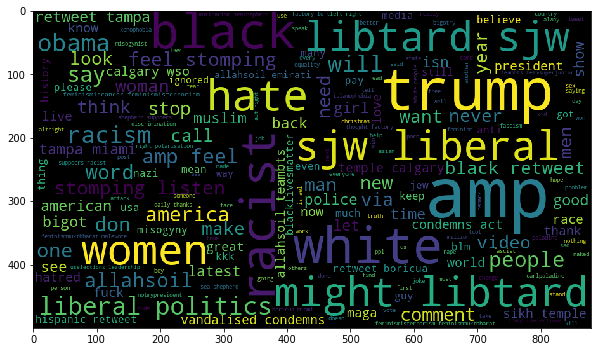

In [0]:

from wordcloud import WordCloud
wordcloud=WordCloud(width=880,height=500,random_state=21,max_font_size=110).generate(allw)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

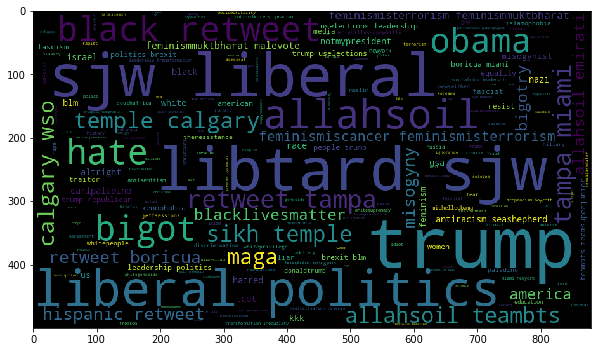

In [0]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=880,height=500,random_state=21,max_font_size=110).generate(allhash)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

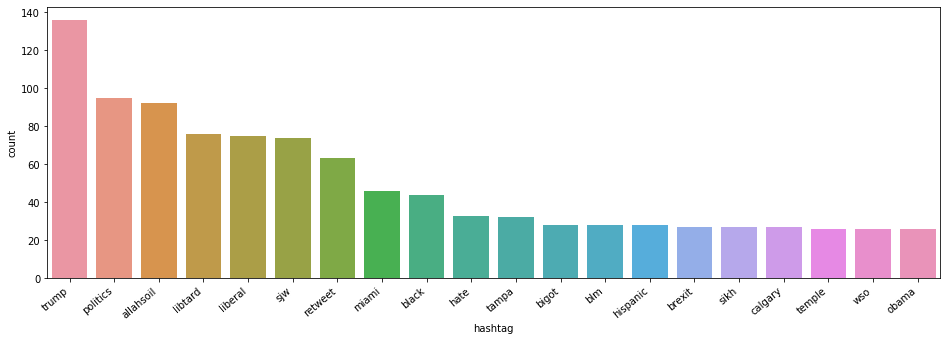

In [0]:
import nltk
import seaborn as sns
a=nltk.FreqDist(allhash.split())
b=pd.DataFrame({"hashtag":list(a.keys()),"count":list(a.values())})
b.sample(10)
b=b.nlargest(columns="count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=b,x="hashtag",y="count")
ax.set_xticklabels(b["hashtag"],rotation=40,ha='right')
ax.set(ylabel="count")
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
df=combDf[combDf["label"].isin([0,1])]
df["new_tweet"]+=df["hash"]
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=3000,stop_words="english",ngram_range=(1,2))
bow=tfidf_vectorizer.fit_transform(df["new_tweet"])
bow.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(31962, 3000)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
x=bow
y=df["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
model=RandomForestClassifier(n_estimators=16,min_samples_split=20,min_samples_leaf=1,max_features="sqrt",max_depth=None,bootstrap=True)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
yp=model.predict(x_test)
cm=confusion_matrix(yp,y_test)
print(np.shape(yp==0))
y_test[y_test==1].count()
cm




0.960275258054426
(3197,)


array([[2935,   97],
       [  30,  135]])

In [0]:
threshold=0.5
yp2_prob=model.predict_proba(x_test)
yp2=(yp2_prob[:,1]>=threshold).astype("int")
cm=confusion_matrix(yp2,y_test)
y_test[y_test==1].count()
cm

array([[2935,   96],
       [  30,  136]])

In [0]:
s1="white and black are not same"
s1New=tfidf_vectorizer.transform([s1])
p=model.predict(s1New)
print(p)
new_prob=model.predict_proba(s1New)
p2=(new_prob[:,1]>=threshold).astype("int")
print(p2)

[0.]
[0]


In [0]:
df=pd.read_csv("train.csv")
df.groupby("label").label.count()
vectorizer=TfidfVectorizer(min_df=2,max_df=0.95,max_features=500000,ngram_range=(1,2))
sparsematrix=vectorizer.fit_transform(df.tweet)
sparsematrix.shape


(31962, 52819)

In [0]:
x=sparsematrix
y=df.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,precision_score
model=MultinomialNB()
model.fit(x_train,y_train)
precision_score(y_test,model.predict(x_test))

1.0

In [0]:
def acc_vs_size(s):
  df=pd.read_csv("train.csv")
  df.groupby("label").label.count()
  vectorizer=TfidfVectorizer(min_df=2,max_df=0.95,max_features=s,ngram_range=(1,2))
  sparsematrix=vectorizer.fit_transform(df.tweet)
  sparsematrix.shape
  x=sparsematrix
  y=df.label
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
  model=MultinomialNB()
  model.fit(x_train,y_train)
  return(precision_score(y_test,model.predict(x_test)))
sizes=[x for x in range(1000,100000,10000)]
accuracy=[acc_vs_size(size) for size in sizes]


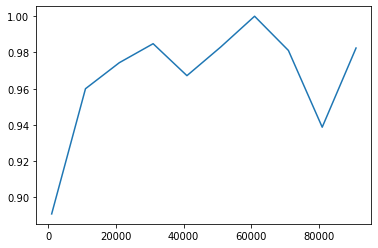

In [0]:
plt.plot(sizes,accuracy)